C:\Users\S\AppData\Local\Temp\ipykernel_3088\1469498199.py:5: DtypeWarning: Columns (17,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'D:\Courses\718 - Spatial and Spatiotemporal Statistics\Project\Extrnl_Collisions.csv')


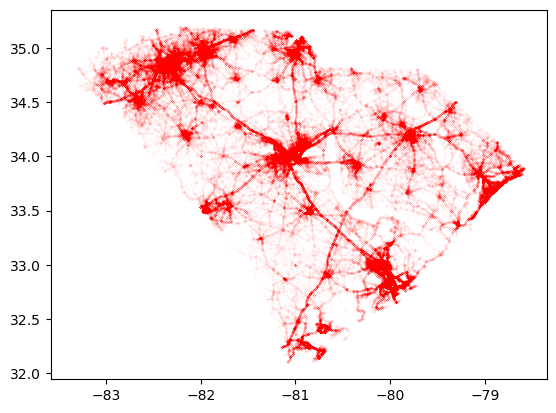

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\Courses\718 - Spatial and Spatiotemporal Statistics\Project\Extrnl_Collisions.csv')

plt.figure()
plt.scatter(data['X'], data['Y'], color = 'red',s = 0.01, alpha=0.1)


Index(['X', 'Y', 'OBJECTID', 'AccidentNumber', 'County', 'CrashDate',
       'dayofweek', 'hour', 'Agency', 'NumberOfUnits', 'NumberOfFatalities',
       'NumberOfInjuries', 'Possible_Injuries', 'Suspected_Minor_Injuries',
       'Suspected_Serious_Injuries', 'JunctionType', 'RouteCategory',
       'RouteNum', 'Street', 'RouteCategoryBaseInt', 'RouteNumBaseInt',
       'StreetBaseInt', 'RouteCategorySecInt', 'RouteNumSecInt',
       'StreetSecInt', 'FirstHarmfulEvent', 'MostHarmfulEvent',
       'PrimaryFactor', 'OtherFactor1', 'LightingCondition',
       'RoadSurfaceCondition', 'TrafficControlType', 'WeatherCondition',
       'Latitude', 'Longitude', 'CMV', 'WorkZone', 'TotalNumberOfOccupants',
       'Unknown_HitAndRunOnly', 'TroopPost', 'Troop', 'Year', 'MonthNumber',
       'Month'],
      dtype='object')


<Axes: xlabel='County'>

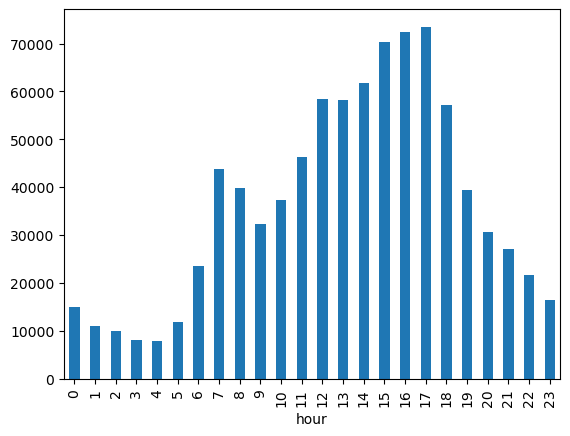

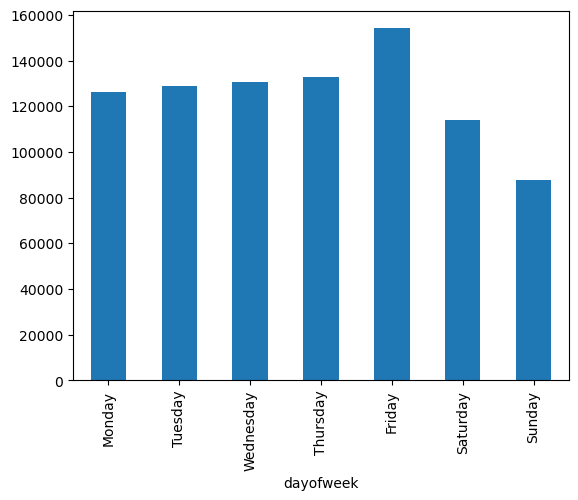

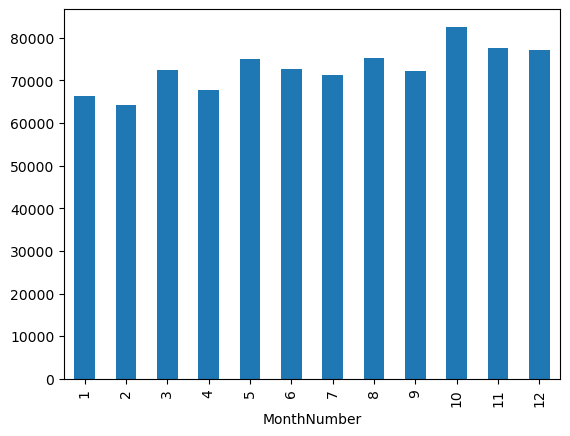

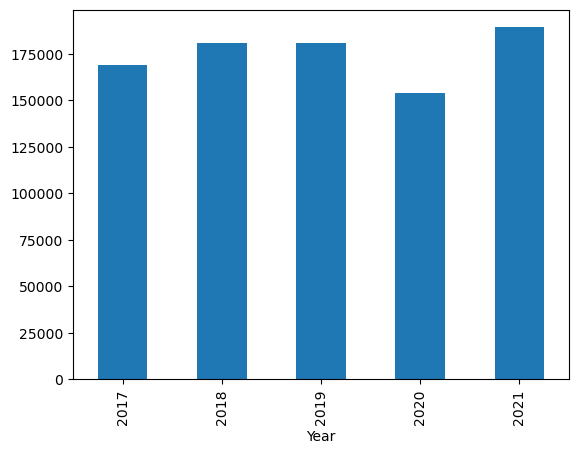

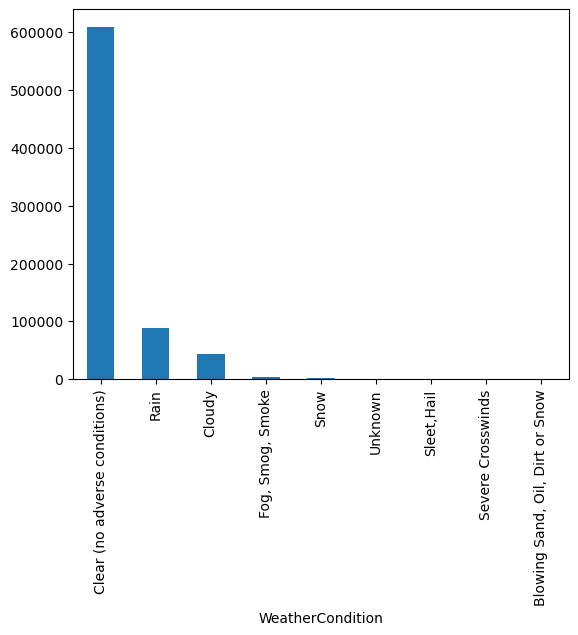

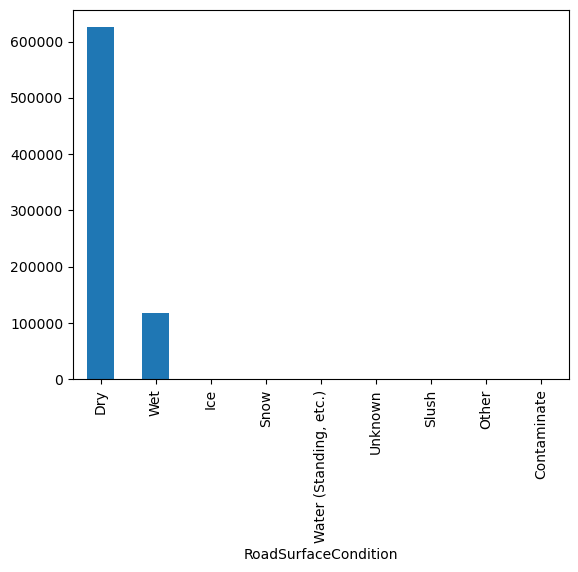

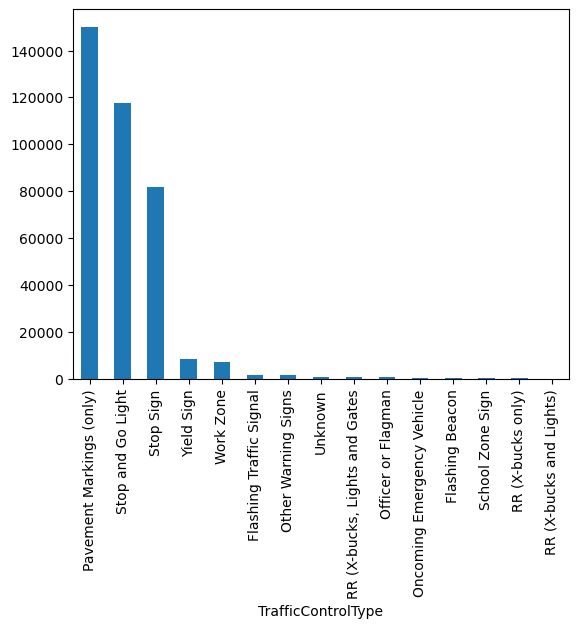

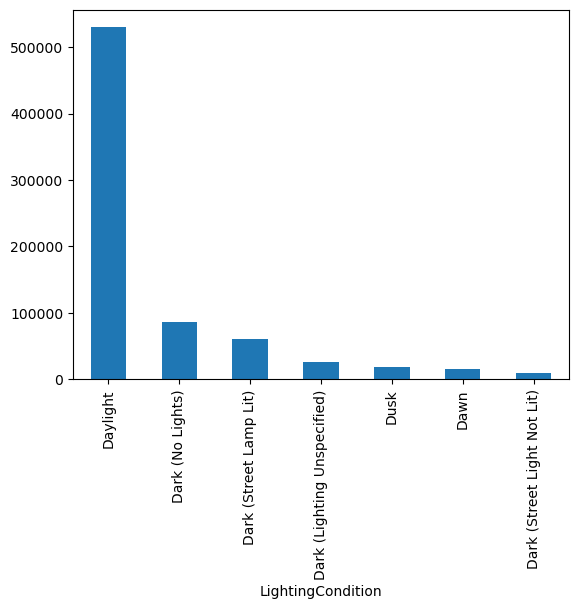

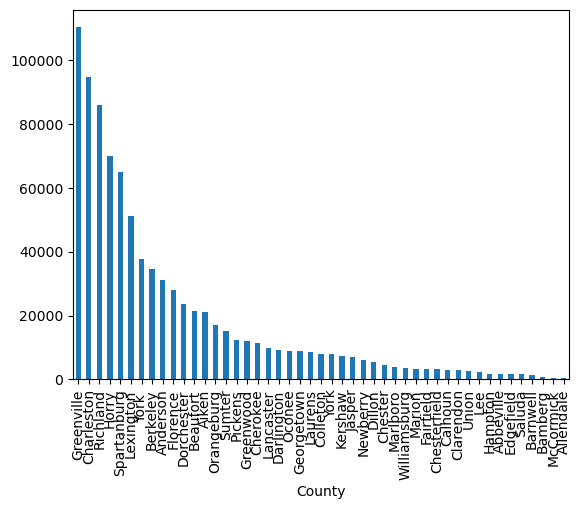

In [3]:
print(data.columns)

# ##############################################################################
# in hour
plt.figure()
data['hour'].value_counts().sort_index().plot(kind='bar')

# ##############################################################################
# in dayofweek
plt.figure()
data['dayofweek'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')

# ##############################################################################
# in month
plt.figure()
data['MonthNumber'].value_counts().sort_index().plot(kind='bar')

# ##############################################################################
# in year
plt.figure()
data['Year'].value_counts().sort_index().plot(kind='bar')

# ##############################################################################
# in weather
plt.figure()
data['WeatherCondition'].value_counts().plot(kind='bar')

# ##############################################################################
# in road surface condition
plt.figure()
data['RoadSurfaceCondition'].value_counts().plot(kind='bar')

# ##############################################################################
# in traffic control type
plt.figure()
data['TrafficControlType'].value_counts().plot(kind='bar')

# ##############################################################################
# in light condition
plt.figure()
data['LightingCondition'].value_counts().plot(kind='bar')

# ##############################################################################
# in County
plt.figure()
data['County'].value_counts().plot(kind='bar')

['I 26' 'I-26' 'I26']


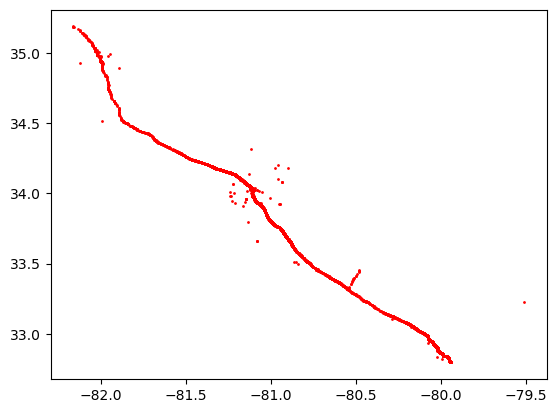

In [4]:
# Just need to keep the data of some streets, like I-26 freeway. It can be I 26, I26, 26, etc.
# list all the streets, and count the number of accidents on each street

data26 = data[data['Street'].isin(['I 26', 'I26', 'I-26'])]
print(data26['Street'].unique())

plt.figure()
plt.scatter(data26['X'], data26['Y'], color = 'red',s = 1, alpha=1)



<Axes: >

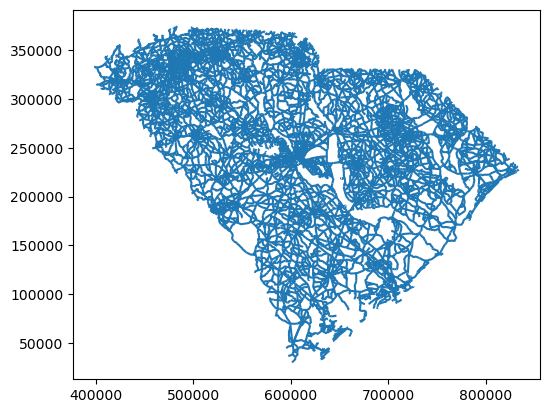

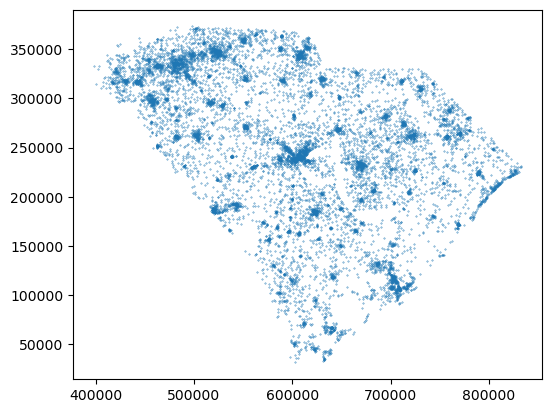

In [24]:
# read shapefile
import geopandas as gpd
import matplotlib.pyplot as plt

roadlines = gpd.read_file(r'D:\Courses\718 - Spatial and Spatiotemporal Statistics\Project\2023_Statewide_Traffic_Lines\TrafficLines2023.shp')
roadpoints = gpd.read_file(r'D:\Courses\718 - Spatial and Spatiotemporal Statistics\Project\2023_Statewide_Traffic_Points\TrafficPoints2023.shp')
roadlines.plot()
roadpoints.plot(markersize = 0.1)

EPSG:32133
metre


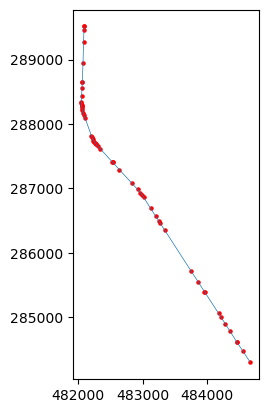

In [63]:

import matplotlib.pyplot as plt

firstroad = roadlines.iloc[[0]]

print(firstroad.crs)
print(firstroad.crs.axis_info[0].unit_name)

firstroad.plot(linewidth = 0.5)


x, y = firstroad.geometry.iloc[0].xy

x = list(x)
y = list(y)

plt.scatter(x, y, color = 'red', s=5)
plt.savefig('firstroad.svg', format='svg')


[   0.    0.    0.    0. 1696.  583.    0.    0.  869. 1447.  299. 2095.
    0.  638.  482.  423. 3318.    0.    0.  452. 1061.  175.  458.  241.
    0. 4652.    0.    0. 2650.    0. 1522.    0.    0. 2060.  779.  602.
    0.    0. 2634.  540.  871.    0.    0.    0.    0.    0.    0. 3951.
    0.    0. 4310.    0.    0.]
53
55


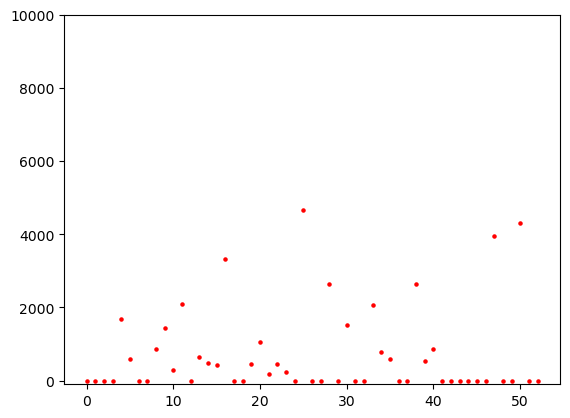

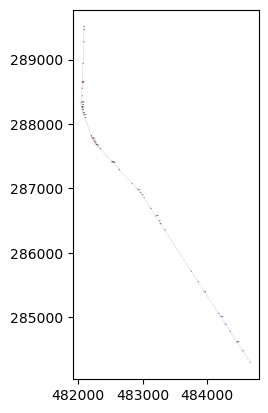

In [ ]:
import numpy as np


def rp3(xlist, ylist, noise = 1e-8):
    # compute the empirical radius from three points
    # to realize batch processing, the input is a list of x and y
    # we assume the xlist and ylist have the same length
    # and also assume that the length of xlist and ylist is larger than 3
    # Besides, assume that the list in in space order

    # Since we need at least three points to compute the radius,
    # so, for a list of 10, we can compute 8 radius.

    # since in realiy, three points may in the same line
    # we add random noise to the points to avoid this situation
    # the size of the noise is 1/1000000 of the smallest difference of two points
    # except zero.
    # This is ok because the radius is not that sensitive to the results.

    # generate the coordinates of the points
    # the length of x1, x2, etc is len(xlist) - 2
    # we use x1[0], x2[0], x3[0] y1[0], y2[0], y3[0] to represent the first three points
    # And so on.

    n = len(xlist)

    x1 = np.array(xlist[:-2])
    x2 = np.array(xlist[1:-1])
    x3 = np.array(xlist[2:])

    y1 = np.array(ylist[:-2])
    y2 = np.array(ylist[1:-1])
    y3 = np.array(ylist[2:])

    # calculate the minimum gap of two points
    # no need to calculate the distance, just use the difference of the coordinates
    # because we just want to add some noise and keep the noise a small value compared to the distance

    xgap = min(i for i in np.abs(np.diff(xlist)) if i != 0)
    ygap = min(i for i in np.abs(np.diff(ylist)) if i != 0)
    gap = min(xgap, ygap)

    # add noise
    noise = gap * noise
    x1 = x1 + np.random.uniform(-noise, noise, n-2)
    x2 = x2 + np.random.uniform(-noise, noise, n-2)
    x3 = x3 + np.random.uniform(-noise, noise, n-2)

    y1 = y1 + np.random.uniform(-noise, noise, n-2)
    y2 = y2 + np.random.uniform(-noise, noise, n-2)
    y3 = y3 + np.random.uniform(-noise, noise, n-2)

    # Compute circumcenter coordinates (xc, yc)
    D = 2 * (x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))

    x_num = ((x1**2 + y1**2) * (y2 - y3) +
             (x2**2 + y2**2) * (y3 - y1) +
             (x3**2 + y3**2) * (y1 - y2))
    
    y_num = ((x1**2 + y1**2) * (x3 - x2) +
             (x2**2 + y2**2) * (x1 - x3) +
             (x3**2 + y3**2) * (x2 - x1))

    xc = x_num / D
    yc = y_num / D

    # Compute radius (distance from circumcenter to any point, e.g., (x1, y1))
    R = np.sqrt((x1 - xc)**2 + (y1 - yc)**2)

    return R


r = rp3(x, y)
r[r > 5000] = 0
r = np.round(r, 0)
print(r)
print(len(r))
print(len(x))
plt.scatter(range(0, len(r)), r, color = 'red', s=5)
plt.ylim(-100, 1e4)

firstroad.plot(linewidth = 0.1)

colorpool = ['red', 'green', 'blue', 'orange', 'purple']
colors = np.random.choice(colorpool, size=len(x))

plt.scatter(x, y, color = colors, s=0.01)
for i in range(0, len(r)):
    plt.text(x[i+1], y[i+1], f"{int(r[i])}", fontsize=0.1, color='black') # 
plt.savefig('firstroad_radius.svg', format='svg')
